# Notebook overview
Visualizes the classification performance of DKNN (OOD) detection using ROC curves.

- Loads precomputed scores (CSV) for different DKNN variants (classifiers and thresholds).
- Generates ROC curve plots, either individually or comparing different variants.
- Saves the generated plots to the results directory.

The notebook was used for both datasets (“original” and “resized”); only the path variables need to be adapted.

# Preperation

### imports

In [147]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

### Paths

In [148]:
### The paths for the original and resized data must be adjusted for calculation of original or resized (Replace 'origin' with 'resized' and vice versa).
use_dataset = 'resized'
# use_dataset = 'origin'

### prediction folder to load df
SCORE_DIR_PATH = rf'/home/stud/jleick/masterArbeitProjekt/models/ood/scores/{use_dataset}'
score_dir_path = Path(SCORE_DIR_PATH)
if not score_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {SCORE_DIR_PATH}")

### Folder to save results
RESULT_DIR_PATH = rf'/home/stud/jleick/masterArbeitProjekt/models/ood/scores/{use_dataset}'
result_dir_path = Path(RESULT_DIR_PATH)
if not result_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH}")

### Function - plot_ood_scores

In [149]:
# def plot_ood_scores( scores_df: pd.DataFrame , title:str):
#        fig, ax = plt.subplots(figsize=(8.3, 6))

#        ax.plot(scores_df['id_TPR_on_id'].index, scores_df['id_TPR_on_id'].values, linewidth=1, label='id TPR on id dataset') # '+-', markeredgewidth=1 ,
#        ax.plot(scores_df['id_FPR_on_ood'].index, scores_df['id_FPR_on_ood'].values, linewidth=1, label='id FPR on ood dataset')
#        ax.plot(scores_df['ood_TPR_on_ood'].index, scores_df['ood_TPR_on_ood'].values, linewidth=1, label='ood TPR on ood dataset')

#        ax.set(xlim=(0, 1), xticks=np.arange(0, 1.05, 0.1),
#               ylim=(0, 1), yticks=np.arange(0, 1.05, 0.1))

#        ax.set_xlabel('percentile')
#        ax.set_ylabel('score')

#        ax.set_title(title)
#        ax.grid(True)
#        ax.legend()

#        return fig


### Function - plot_roc_curve

In [150]:
def plot_roc_curve( scores_df: pd.DataFrame , title:str):
       fig, ax = plt.subplots(figsize=(8.3, 6))

       ax.plot(scores_df['FPR_scores'].values, scores_df['TPR_scores'].values, linewidth=1, marker='+', markersize=3,) # , marker='+', markersize=4,

       ax.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
       
       ax.set_xlim(0, 1)
       ax.set_ylim(0, 1)

       ax.set_xticks(np.arange(0, 1.001, 0.1))
       ax.set_yticks(np.arange(0, 1.001, 0.1))
       ax.set_xticks(np.arange(0, 1.001, 0.05), minor=True)
       ax.set_yticks(np.arange(0, 1.001, 0.05), minor=True)

       ax.set_xlabel('1 - Sensitivity (FPR)')
       ax.set_ylabel('Sensitivity (TPR)')

       ax.set_title(title)
       ax.grid(True, which='major', linestyle='-', linewidth=0.5)
       ax.grid(True, which='minor', linestyle=':', linewidth=0.4)  #, alpha=0.8

       return fig

### Function - plot_five_roc_curves

In [151]:
def plot_five_roc_curves( scores1_df: pd.DataFrame, scores2_df: pd.DataFrame, scores3_df: pd.DataFrame, scores4_df: pd.DataFrame, scores5_df: pd.DataFrame , title:str):
       fig, ax = plt.subplots(figsize=(8.3, 6))

       ax.plot(scores1_df['FPR_scores'].values, scores1_df['TPR_scores'].values, linewidth=1, marker='+', markersize=3, label='$over\_all\_examples$') # , marker='+', markersize=4,
       ax.plot(scores2_df['FPR_scores'].values, scores2_df['TPR_scores'].values, linewidth=1, marker='+', markersize=3, label='KNN — $for\_each\_species$') # , marker='+', markersize=4,
       ax.plot(scores3_df['FPR_scores'].values, scores3_df['TPR_scores'].values, linewidth=1, marker='+', markersize=3, label='KNN — $in\_each\_species$') # , marker='+', markersize=4,
       ax.plot(scores4_df['FPR_scores'].values, scores4_df['TPR_scores'].values, linewidth=1, marker='+', markersize=3, label='MLP — $for\_each\_species$') # , marker='+', markersize=4,
       ax.plot(scores5_df['FPR_scores'].values, scores5_df['TPR_scores'].values, linewidth=1, marker='+', markersize=3, label='MLP — $in\_each\_species$') # , marker='+', markersize=4,
       
       ax.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)

       ax.set_xlim(0, 1)
       ax.set_ylim(0, 1)

       ax.set_xticks(np.arange(0, 1.001, 0.1))
       ax.set_yticks(np.arange(0, 1.001, 0.1))
       ax.set_xticks(np.arange(0, 1.001, 0.05), minor=True)
       ax.set_yticks(np.arange(0, 1.001, 0.05), minor=True)

       ax.set_xlabel('1 - Sensitivity (FPR)', fontsize=13)
       ax.set_ylabel('Sensitivity (TPR)', fontsize=13)
       ax.tick_params(axis='x', labelsize=13)
       ax.tick_params(axis='y', labelsize=13)

       # ax.set_title(title)
       ax.grid(True, which='major', linestyle='-', linewidth=0.5)
       ax.grid(True, which='minor', linestyle=':', linewidth=0.4)  #, alpha=0.8

       ax.legend(fontsize=14, loc='lower right')

       return fig

<>:4: SyntaxWarning: invalid escape sequence '\_'
<>:5: SyntaxWarning: invalid escape sequence '\_'
<>:6: SyntaxWarning: invalid escape sequence '\_'
<>:7: SyntaxWarning: invalid escape sequence '\_'
<>:8: SyntaxWarning: invalid escape sequence '\_'
<>:4: SyntaxWarning: invalid escape sequence '\_'
<>:5: SyntaxWarning: invalid escape sequence '\_'
<>:6: SyntaxWarning: invalid escape sequence '\_'
<>:7: SyntaxWarning: invalid escape sequence '\_'
<>:8: SyntaxWarning: invalid escape sequence '\_'
/tmp/ipykernel_3283242/3402246213.py:4: SyntaxWarning: invalid escape sequence '\_'
  ax.plot(scores1_df['FPR_scores'].values, scores1_df['TPR_scores'].values, linewidth=1, marker='+', markersize=3, label='$over\_all\_examples$') # , marker='+', markersize=4,
/tmp/ipykernel_3283242/3402246213.py:5: SyntaxWarning: invalid escape sequence '\_'
  ax.plot(scores2_df['FPR_scores'].values, scores2_df['TPR_scores'].values, linewidth=1, marker='+', markersize=3, label='KNN — $for\_each\_species$') # , m

### Function - run_score_visualisation

In [152]:
def run_score_visualisation( scores_load_path: Path, plot_save_path: Path):
    high_id_ood_scores_df = pd.read_csv( scores_load_path / 'high_id_ood_scores.csv', index_col=0 )
    low_id_ood_scores_df = pd.read_csv( scores_load_path / 'low_id_ood_scores.csv', index_col=0 )

    # high
    ood_scores_high_plt = plot_roc_curve( high_id_ood_scores_df , 'high_id_ood_scores')
    ood_scores_high_plt.savefig( plot_save_path / 'high_id_ood_score_visualisation.pdf')

    # low
    ood_scores_low_plt = plot_roc_curve( low_id_ood_scores_df , 'low_id_ood_scores')
    ood_scores_low_plt.savefig( plot_save_path / 'low_id_ood_score_visualisation.pdf')

In [153]:
plt.close('all')

### Function - run_scores_visualisation

In [154]:
def run_scores_visualisation( scores_load_path: Path, plot_save_path: Path, dataset_name:str):
    # high
    scores1_df = pd.read_csv( scores_load_path / 'over_all_examples' / 'high_id_ood_scores.csv', index_col=0 )
    scores2_df = pd.read_csv( scores_load_path / 'knn/for_each_species' / 'high_id_ood_scores.csv', index_col=0 )
    scores3_df = pd.read_csv( scores_load_path / 'knn/in_each_species' / 'high_id_ood_scores.csv', index_col=0 )
    scores4_df = pd.read_csv( scores_load_path / 'mlp/for_each_species' / 'high_id_ood_scores.csv', index_col=0 )
    scores5_df = pd.read_csv( scores_load_path / 'mlp/in_each_species' / 'high_id_ood_scores.csv', index_col=0 )

    high_ood_scores_plt = plot_five_roc_curves(scores1_df, scores2_df, scores3_df, scores4_df, scores5_df, f'ROC Curve on high {dataset_name} Dataset')

    high_ood_scores_plt.savefig( plot_save_path / 'high_id_ood_scores_visualisation.pdf')

    # low
    scores1_df = pd.read_csv( score_dir_path / 'over_all_examples' / 'low_id_ood_scores.csv', index_col=0 )
    scores2_df = pd.read_csv( score_dir_path / 'knn/for_each_species' / 'low_id_ood_scores.csv', index_col=0 )
    scores3_df = pd.read_csv( score_dir_path / 'knn/in_each_species' / 'low_id_ood_scores.csv', index_col=0 )
    scores4_df = pd.read_csv( score_dir_path / 'mlp/for_each_species' / 'low_id_ood_scores.csv', index_col=0 )
    scores5_df = pd.read_csv( score_dir_path / 'mlp/in_each_species' / 'low_id_ood_scores.csv', index_col=0 )

    low_ood_scores_plt = plot_five_roc_curves(scores1_df, scores2_df, scores3_df, scores4_df, scores5_df, f'ROC Curve on low {dataset_name} Dataset')

    low_ood_scores_plt.savefig( plot_save_path / 'low_id_ood_scores_visualisation.pdf')

# Apply score

### Apply - over_all_species

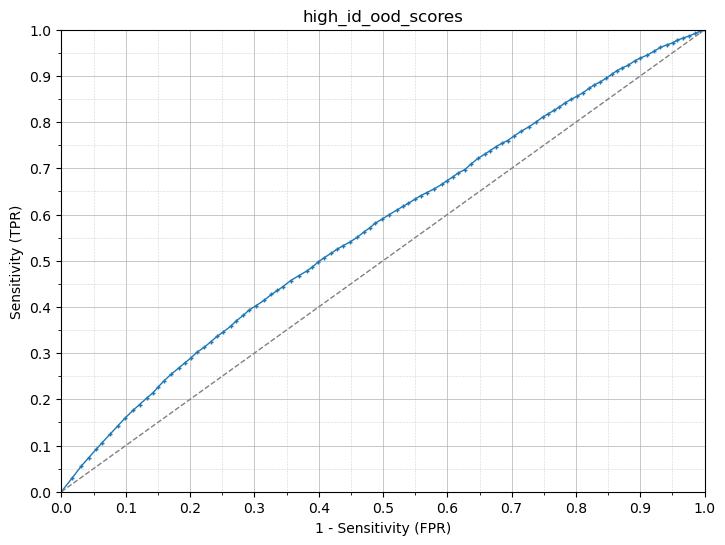

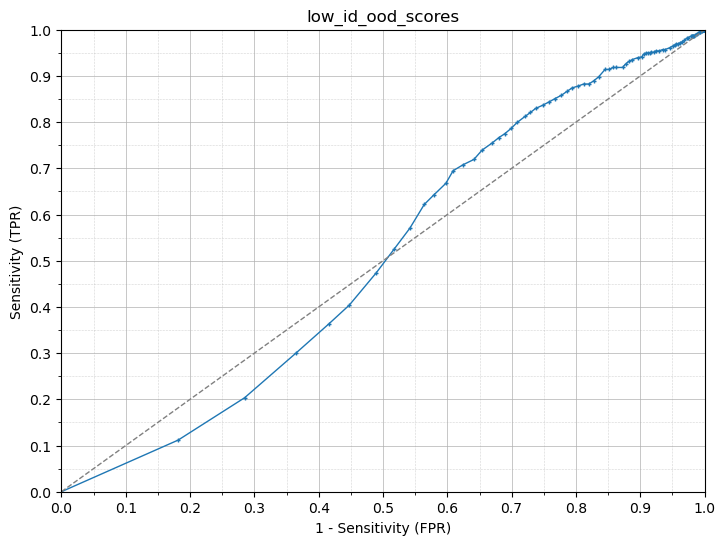

In [155]:
run_score_visualisation(
    score_dir_path / 'over_all_examples',
    result_dir_path / 'over_all_examples/visualisation'
)

# knn 

### Apply - for_each_species

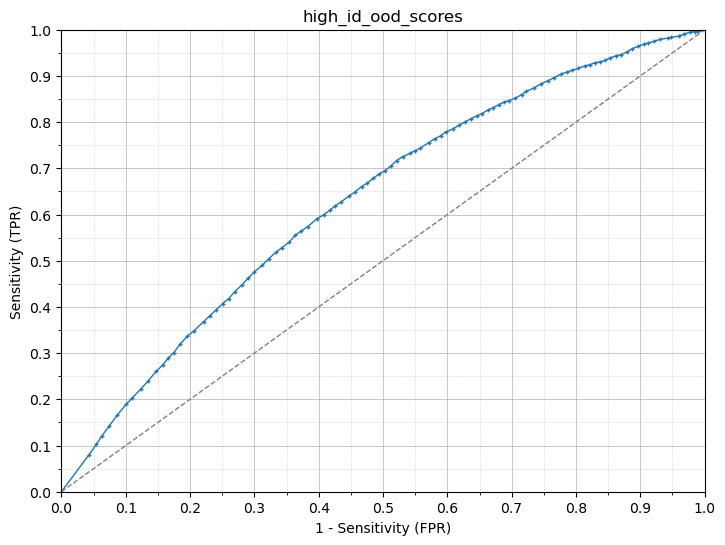

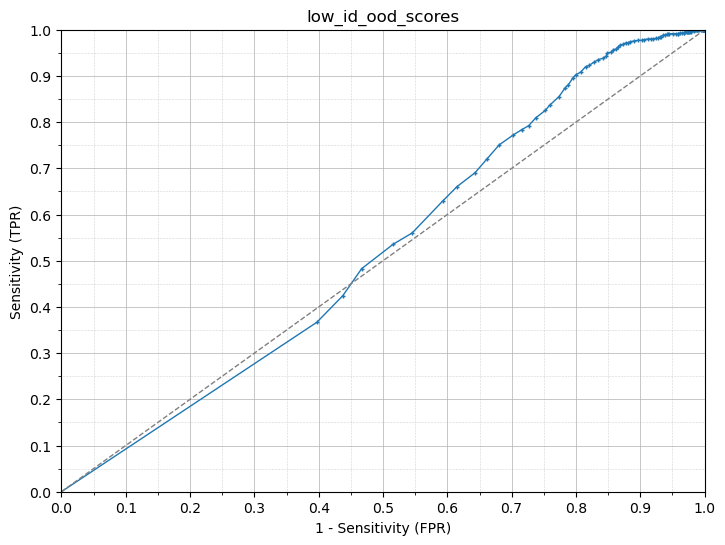

In [156]:
run_score_visualisation(
    score_dir_path / 'knn/for_each_species',
    result_dir_path / 'knn/for_each_species/visualisation'
)

### Apply - in_each_species

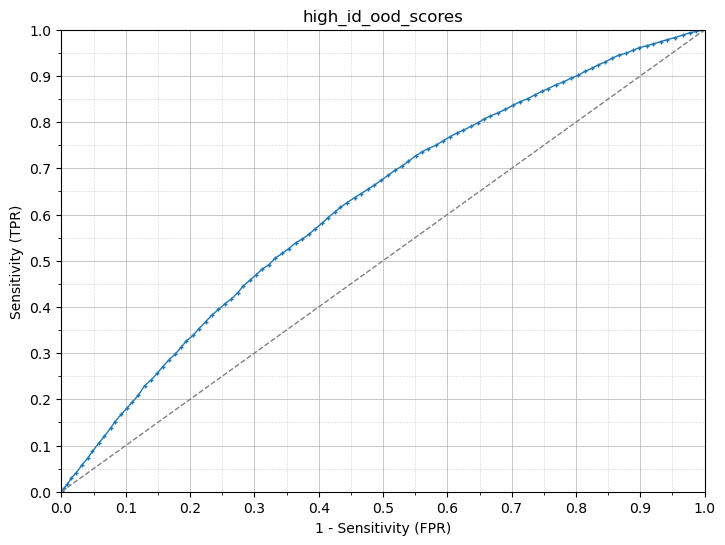

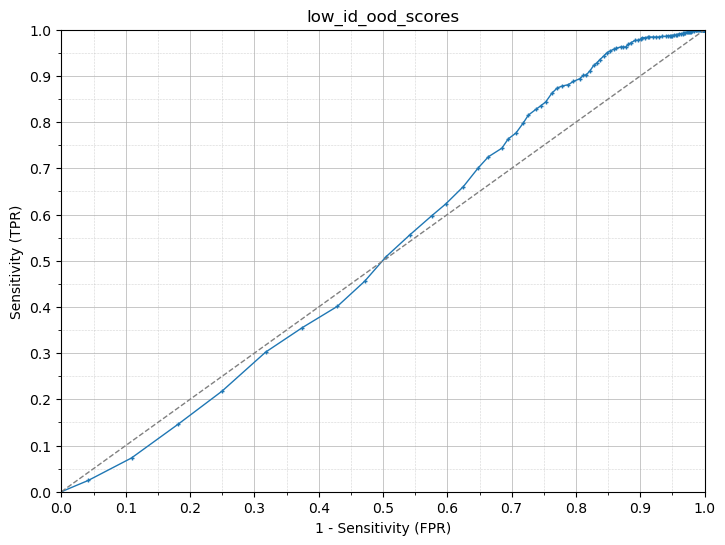

In [157]:
run_score_visualisation(
    score_dir_path / 'knn/in_each_species',
    result_dir_path / 'knn/in_each_species/visualisation'
)

# mlp

### Apply - for_each_species

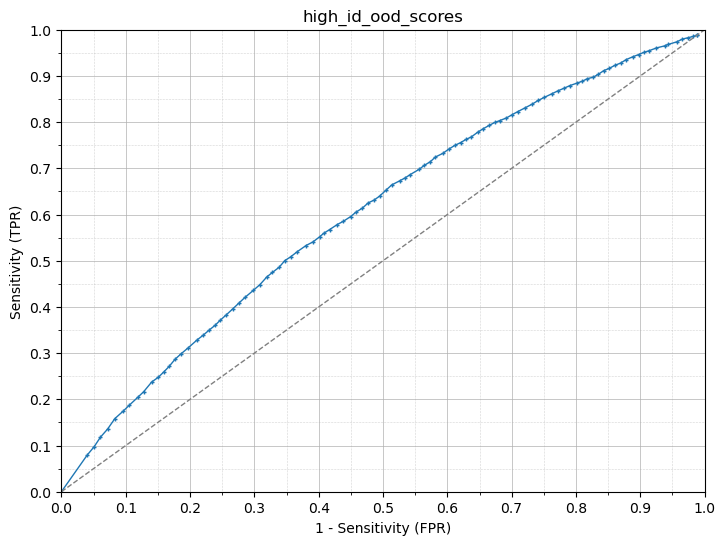

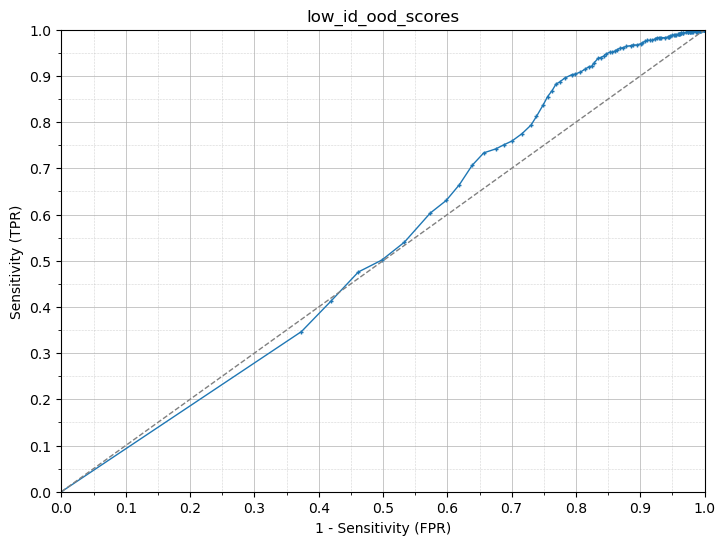

In [158]:
run_score_visualisation(
    score_dir_path / 'mlp/for_each_species',
    result_dir_path / 'mlp/for_each_species/visualisation'
)

### Apply - in_each_species

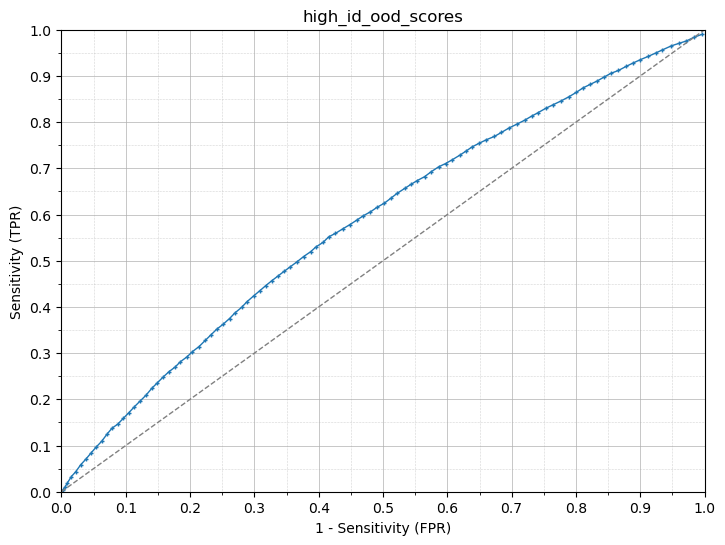

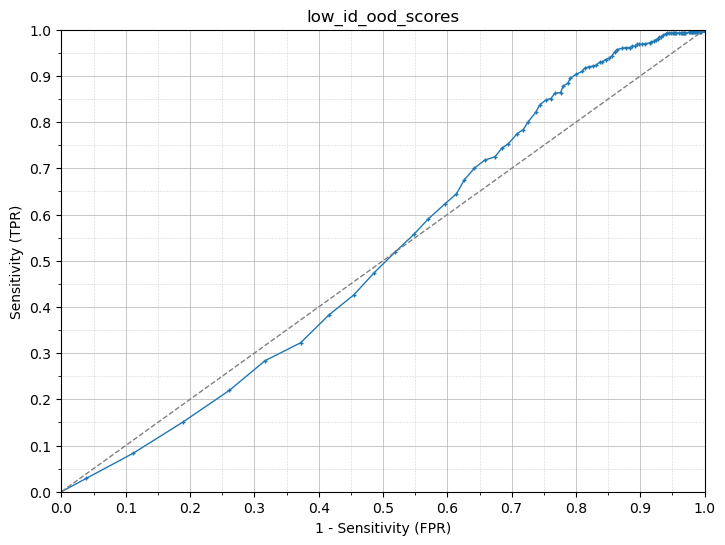

In [159]:
run_score_visualisation(
    score_dir_path / 'mlp/in_each_species',
    result_dir_path / 'mlp/in_each_species/visualisation'
)

# Appy scores

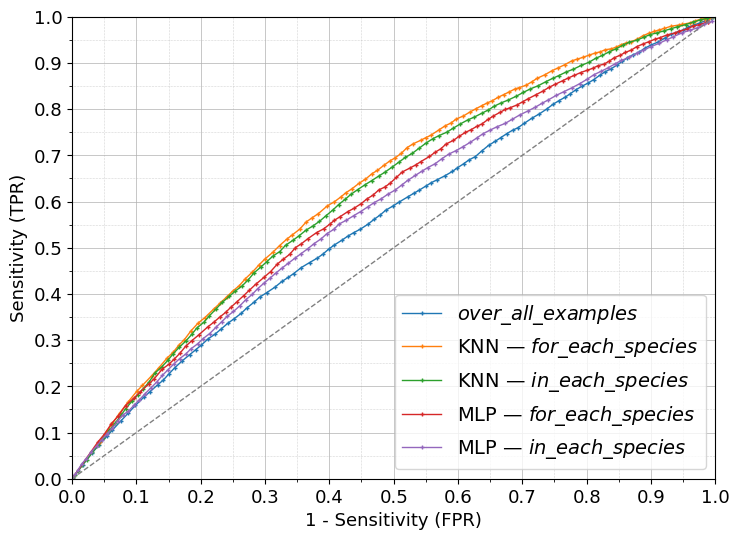

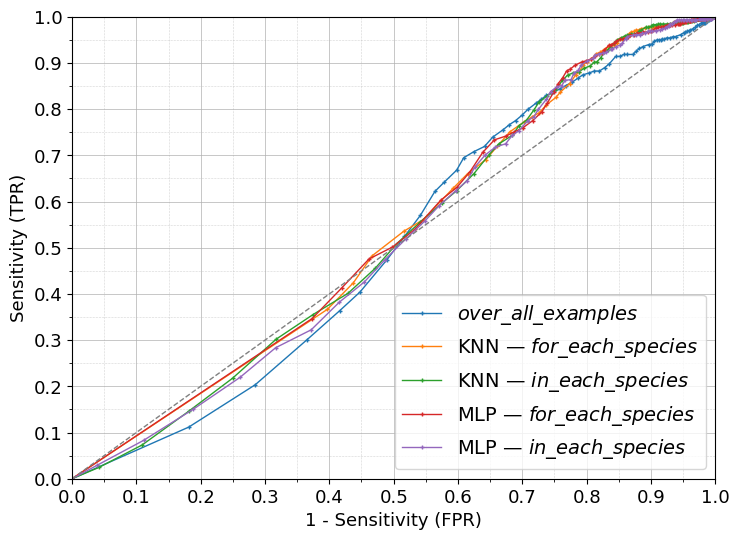

In [160]:
run_scores_visualisation(score_dir_path, result_dir_path, use_dataset)